In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score, recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading the data into dataframe
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv')

df

Age Number of sexual partners First sexual intercourse   
0     18                         4                       15  \
1     15                         1                       14   
2     34                         1                        ?   
3     52                         5                       16   
4     46                         3                       21   
5     42                         3                       23   
6     51                         3                       17   
7     26                         1                       26   
8     45                         1                       20   
9     44                         3                       15   
10    44                         3                       26   
11    27                         1                       17   
12    45                         4                       14   
13    44                         2                       25   
14    43                         2                       18   
15    40                         3                       18   
16    41                         4                       21   
17    43                         3                       15   
18    42                         2                       20   
19    40                         2                       27   
20    43                         2                       18   
21    41                         3                       17   
22    40                         1                       18   
23    40                         1                       20   
24    40                         3                       15   
25    44                         3                       19   
26    39                         5                       23   
27    39                         2                       17   
28    37                         3                       24   
29    37                         6                       26   
30    41                         3                       17   
31    40                         2                       21   
32    37                         3                       17   
33    37                         3                       15   
34    38                         2                       15   
35    37                         3                       17   
36    39                         2                       17   
37    37                         ?                       18   
38    39                         1                       24   
39    36                         2                       20   
40    37                         ?                       17   
41    37                         2                       18   
42    36                         3                       18   
43    36                         3                       17   
44    37                         3                       19   
45    36                         1                       17   
46    36                         2                       18   
47    40                         2                       20   
48    41                         2                       17   
49    37                         3                       18   
50    36                         3                       15   
51    36                         2                       17   
52    36                         5                       17   
53    35                         3                       18   
54    36                         1                       16   
55    41                         4                       16   
56    35                         5                       15   
57    33                         3                       21   
58    35                         2                       18   
59    35                         3                       17   
60    34                         3                       19   
61    35                         3                       20   
62    35                         1  

In [54]:

# Loading the data into dataframe and replacing "?" with NaN
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv', na_values='?')

# Imputing the missing values with mean
df = df.fillna(df.mean())

df


Age  Number of sexual partners  First sexual intercourse   
0     18                   4.000000                   15.0000  \
1     15                   1.000000                   14.0000   
2     34                   1.000000                   16.9953   
3     52                   5.000000                   16.0000   
4     46                   3.000000                   21.0000   
5     42                   3.000000                   23.0000   
6     51                   3.000000                   17.0000   
7     26                   1.000000                   26.0000   
8     45                   1.000000                   20.0000   
9     44                   3.000000                   15.0000   
10    44                   3.000000                   26.0000   
11    27                   1.000000                   17.0000   
12    45                   4.000000                   14.0000   
13    44                   2.000000                   25.0000   
14    43                   2.000000                   18.0000   
15    40                   3.000000                   18.0000   
16    41                   4.000000                   21.0000   
17    43                   3.000000                   15.0000   
18    42                   2.000000                   20.0000   
19    40                   2.000000                   27.0000   
20    43                   2.000000                   18.0000   
21    41                   3.000000                   17.0000   
22    40                   1.000000                   18.0000   
23    40                   1.000000                   20.0000   
24    40                   3.000000                   15.0000   
25    44                   3.000000                   19.0000   
26    39                   5.000000                   23.0000   
27    39                   2.000000                   17.0000   
28    37                   3.000000                   24.0000   
29    37                   6.000000                   26.0000   
30    41                   3.000000                   17.0000   
31    40                   2.000000                   21.0000   
32    37                   3.000000                   17.0000   
33    37                   3.000000                   15.0000   
34    38                   2.000000                   15.0000   
35    37                   3.000000                   17.0000   
36    39                   2.000000                   17.0000   
37    37                   2.527644                   18.0000   
38    39                   1.000000                   24.0000   
39    36                   2.000000                   20.0000   
40    37                   2.527644                   17.0000   
41    37                   2.000000                   18.0000   
42    36                   3.000000                   18.0000   
43    36                   3.000000                   17.0000   
44    37                   3.000000                   19.0000   
45    36                   1.000000                   17.0000   
46    36                   2.000000                   18.0000   
47    40                   2.000000                   20.0000   
48    41                   2.000000                   17.0000   
49    37                   3.000000                   18.0000   
50    36                   3.000000                   15.0000   
51    36                   2.000000                   17.0000   
52    36                   5.000000                   17.0000   
53    35                   3.000000                   18.0000   
54    36                   1.000000                   16.0000   
55    41                   4.000000                   16.0000   
56    35                   5.000000                   15.0000   
57    33                   3.000000                   21.0000   
58    35                   2.000000                   18.0000   
59    35                   3.000000                   17.0000   
60    34                   3.000000     

In [55]:
# Identifying those columns which contain the outliers
cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']

# Calculating the statistical measures for all these columns
means = df[cols].mean()
stds = df[cols].std()
q1s = df[cols].quantile(0.25)
q3s = df[cols].quantile(0.75)

# Defining a threshold for identifying outliers as 3
threshold = 3

# Using the method of Boolean indexing to identify those rows which contain outliers in the selected columns
outliers = np.any(np.abs((df[cols] - means) / stds) > threshold, axis=1)

# Removing those rows from the DataFrame by using the drop method
df = df.drop(df[outliers].index)

# Reseting the index of the DataFrame to have continuous numbering
df = df.reset_index(drop=True)

display(df)


Age  Number of sexual partners  First sexual intercourse   
0     18                   4.000000                   15.0000  \
1     15                   1.000000                   14.0000   
2     34                   1.000000                   16.9953   
3     42                   3.000000                   23.0000   
4     44                   3.000000                   15.0000   
5     27                   1.000000                   17.0000   
6     44                   2.000000                   25.0000   
7     41                   4.000000                   21.0000   
8     40                   3.000000                   15.0000   
9     44                   3.000000                   19.0000   
10    39                   2.000000                   17.0000   
11    37                   3.000000                   24.0000   
12    39                   2.000000                   17.0000   
13    37                   2.527644                   18.0000   
14    39                   1.000000                   24.0000   
15    36                   2.000000                   20.0000   
16    37                   2.527644                   17.0000   
17    36                   3.000000                   18.0000   
18    36                   3.000000                   17.0000   
19    36                   2.000000                   18.0000   
20    37                   3.000000                   18.0000   
21    36                   2.000000                   17.0000   
22    36                   5.000000                   17.0000   
23    36                   1.000000                   16.0000   
24    35                   5.000000                   15.0000   
25    33                   3.000000                   21.0000   
26    35                   2.000000                   18.0000   
27    34                   3.000000                   19.0000   
28    35                   1.000000                   21.0000   
29    34                   3.000000                   19.0000   
30    35                   5.000000                   23.0000   
31    34                   2.527644                   16.9953   
32    34                   2.000000                   21.0000   
33    35                   2.000000                   20.0000   
34    33                   3.000000                   21.0000   
35    35                   2.000000                   19.0000   
36    32                   3.000000                   18.0000   
37    34                   1.000000                   20.0000   
38    36                   2.000000                   20.0000   
39    35                   5.000000                   18.0000   
40    32                   3.000000                   16.0000   
41    36                   1.000000                   13.0000   
42    33                   3.000000                   16.0000   
43    31                   4.000000                   16.0000   
44    35                   1.000000                   18.0000   
45    31                   1.000000                   20.0000   
46    33                   3.000000                   18.0000   
47    31                   3.000000                   18.0000   
48    33                   2.000000                   17.0000   
49    34                   4.000000                   18.0000   
50    33                   5.000000                   19.0000   
51    32                   2.000000                   15.0000   
52    32                   3.000000                   17.0000   
53    23                   5.000000                   23.0000   
54    34                   3.000000                   15.0000   
55    31                   3.000000                   17.0000   
56    30                   3.000000                   16.0000   
57    30                   2.000000                   17.0000   
58    28                   3.000000                   15.0000   
59    33                   1.000000                   16.0000   
60    30                   5.000000     

In [56]:
# Storing the data from the file except the target variables in the dataset X
X = df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'])

# Normalizing the dataset X
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Shifting the dataset to be non-negative
X_norm += abs(X_norm.min())

# Applying PCA in order to extract the principal components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_norm)

display(pd.DataFrame(X_pca[:, :]))


0         1         2         3         4         5         6   
0   -1.548421 -0.611432 -1.945902  0.502718  1.280078 -0.926007  0.568394  \
1   -1.539414 -1.072008 -2.525528 -0.410736 -0.226025  0.832285  0.567389   
2   -1.658638 -0.920908 -0.556724  1.388132 -1.045259  0.538040  0.909060   
3   -1.770858 -0.603747  1.560061  3.496233 -1.012985 -0.837763  0.326336   
4   -0.238437  5.027845 -0.633969  2.738347  0.058758  0.993080  1.334464   
5   -1.567782 -0.121693  2.001752 -1.762811 -0.654978  0.774636  1.119419   
6   -1.753111 -0.257644  3.797810  1.536654 -2.351394 -1.261534  0.195001   
7   -1.729013 -0.071711  2.529115  1.987469  0.354525 -1.008880 -0.975767   
8   -1.628266  0.102330  1.885138  0.056091  1.136754  0.315373  0.423735   
9   -1.715847 -0.552459  0.671535  2.769101 -0.404932 -0.769679  1.044962   
10  -1.707606 -0.439745  1.009591  2.182810  0.603034  1.697327  0.494656   
11  -1.747629  2.008164  0.363672  3.377206 -2.096586 -1.467940  0.003224   
12  -1.684109 -0.148374  2.093433  0.693437  0.499436  1.189273 -0.592039   
13  -1.656022 -0.415920  0.942853  0.637551 -0.494268 -0.909777 -0.296836   
14  -1.804705 -0.792757  2.121714  3.334322 -1.697500  1.181916 -0.293407   
15  -1.690959 -0.302451  2.172268  0.769774 -0.619232  0.112613 -0.560156   
16  -1.707376 -0.295908  1.259984  2.244208  1.283821  1.947583  0.226260   
17  -1.574468  5.165119  2.152173 -0.431466 -0.662100 -0.091844  1.555733   
18  -1.678259 -0.415989  0.465009  2.067159  0.843463  0.574135  0.587808   
19  -1.635709  1.078977  2.156598 -0.113217 -0.478019  0.367296  0.450382   
20  -1.678501 -0.185677  1.657660  0.982774  0.518492 -0.044308 -0.783731   
21  -1.661557 -0.745373 -0.341331  1.695041 -0.467384  0.010054  0.981979   
22  -1.647922  0.146911  1.578594  1.031079  1.934664 -1.000238 -0.633559   
23  -1.566829  0.198443  3.072784 -1.971619 -0.562558  0.870998  2.385836   
24  -1.647891  0.019987  0.546267  2.073738  2.874892  0.334466  0.582724   
25  -1.722101  5.713342  1.823608  2.015385 -0.294573  1.501172 -2.188620   
26  -1.702603 -0.048591  2.698197  0.819712  0.995733  2.112537 -1.243308   
27  -1.638087  0.030726  2.454043  0.024978  0.111394 -0.427149  0.315818   
28  -1.657320 -0.494616  1.999697 -0.079422 -2.281393 -0.741531  0.519026   
29  -1.638087  0.030726  2.454043  0.024978  0.111394 -0.427149  0.315818   
30  -1.712489 -0.138540  2.102306  2.040881  0.116386 -2.463361 -1.192021   
31   8.708230 -0.278803  1.473337  0.977938  0.312010  0.504232  0.137276   
32  -1.698833 -0.545187  1.509650  1.067253 -1.154193 -0.536975 -1.009375   
33  -1.675610 -0.404327  1.721960  0.607184 -0.976038 -0.449812 -0.397715   
34  -1.663552 -0.396970  1.422068  0.746016 -0.984791 -1.715978 -0.381163   
35  -1.686570 -0.375370  1.655818  0.816302 -0.314432  0.320759 -0.900047   
36  -1.579649  0.123885  2.302566 -0.994115 -0.107468 -0.976941  1.387837   
37  -1.648630 -0.537763  1.573834 -0.133230 -1.995133 -0.555109  0.317966   
38  -1.654024 -0.213180  2.342700  0.069933 -1.091828 -0.571781  0.470948   
39  -1.563951  0.581809  3.016904 -0.848198  0.980976 -2.126760  2.054367   
40  -1.605096 -0.175571  0.880586 -0.169498  0.604266 -0.413562 -0.053554   
41   8.710126 -0.100328  1.986036  0.373383  1.465894  3.618882  0.059699   
42  -1.641406 -0.513976 -0.307209  1.585317  0.740391  0.146312  0.791165   
43   8.753222 -0.155114  0.790492  0.756826  1.073725 -0.725296  0.343166   
44  -1.655028 -0.497161  1.326855  0.051281 -1.074910  0.396905 -0.175228   
45   8.650801 -0.454605  2.399137  1.279705 -0.585106  1.963533 -0.706580   
46  -1.575263  0.195941  2.560959 -1.130019 -0.149100 -1.012016  1.701181   
47   8.721501 -0.363583  1.065266  0.959775 -0.003663 -0.483969  0.116520   
48  -1.570294  0.223110  2.887585 -1.599063 -0.168321  0.193957  1.890920   
49  -1.674193  6.292520 -0.373215  2.911178  0.203534  0.851474 -0.147479   
50  -1.617056  3.606923  0.500729  0.866681 -0.018347 -2.323907 -0.326079   
51  -1.5

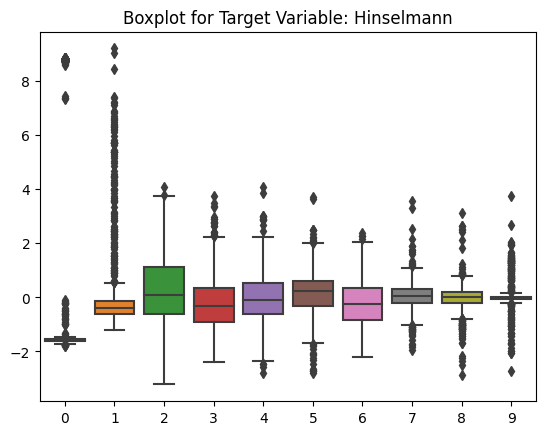

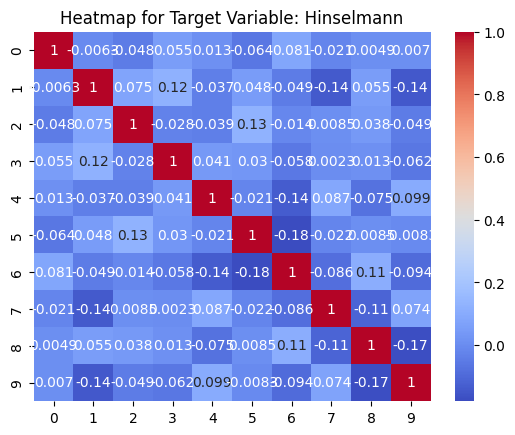

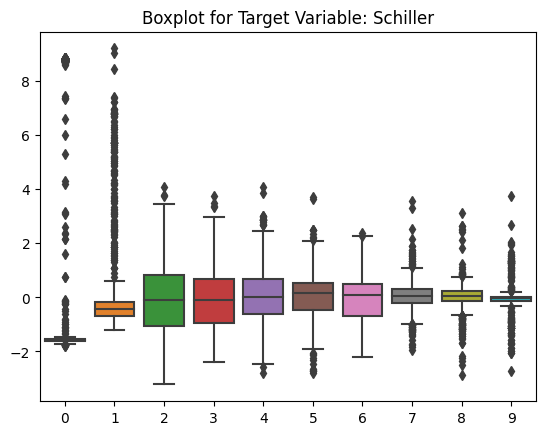

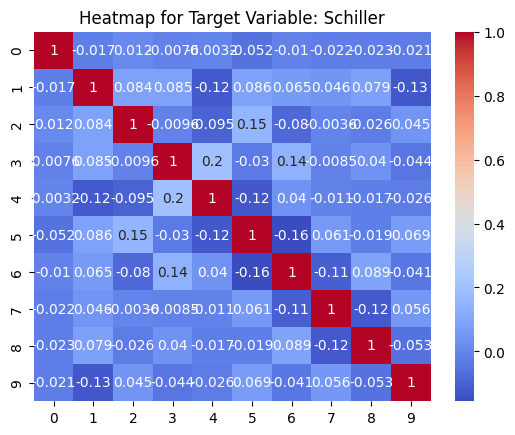

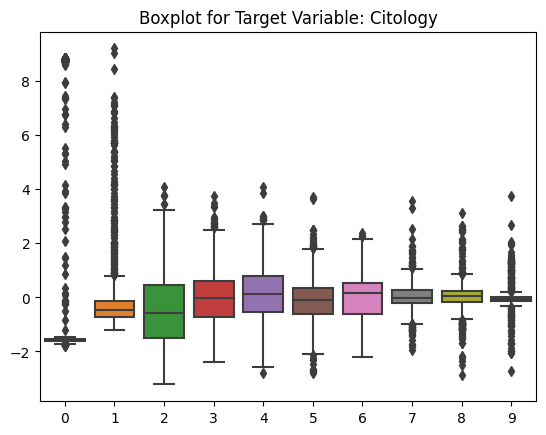

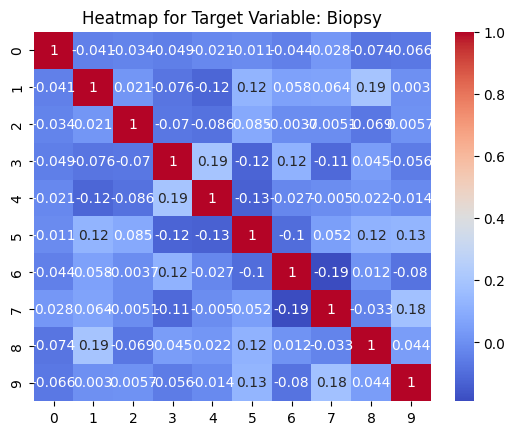

In [57]:
# Creating an empty lists to store the evaluation metrics namely, accuracy, precission and recall
accuracy_list = []
precision_list = []
recall_list = []

# Defining the names of target varibales in a list
target_variable = ['Hinselmann' , 'Schiller' , 'Citology' , 'Biopsy']

# Storing the data of target variables in the dataset Y
Y = df[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]

Train_X_H , Test_X_H , Train_Y_H , Test_Y_H = train_test_split(X_pca , Y['Hinselmann'] , test_size=0.6 , random_state= 42)
Train_X_S , Test_X_S , Train_Y_S , Test_Y_S = train_test_split(X_pca , Y['Schiller'] , test_size=0.6 , random_state= 42)
Train_X_C , Test_X_C , Train_Y_C , Test_Y_C = train_test_split(X_pca , Y['Citology'] , test_size=0.6 , random_state= 42)
Train_X_B , Test_X_B , Train_Y_B , Test_Y_B = train_test_split(X_pca , Y['Biopsy'] , test_size=0.6 , random_state= 42)

# Balancing the dataset by using ASADYN oversampling technique
adasyn = ADASYN (random_state=42)
Hinselmann_x, Hinselmann_y = adasyn.fit_resample(X_pca, Y['Hinselmann'])
Schiller_x, Schiller_y = adasyn.fit_resample(X_pca, Y['Schiller'])
Citology_x, Citology_y = adasyn.fit_resample(X_pca, Y['Citology'])
Biopsy_x, Biopsy_y = adasyn.fit_resample(X_pca, Y['Biopsy'])

# Storing in separate lines the data which is oversampled
risk_factors_x = [ Hinselmann_x , Schiller_x , Citology_x , Biopsy_x ]
risk_factors_y = [ Hinselmann_y , Schiller_y , Citology_y , Biopsy_y ]

for x in range(4):
    # Boxplot for Hinselmann , Schiller , Citology , Biopsy created
    risk_factors_pca_df = pd.DataFrame(risk_factors_x[x])
    sns.boxplot(data=risk_factors_pca_df)
    plt.title("Boxplot for Target Variable: " + target_variable[x])

    plt.show()
    
    # Heatmap of the correlation matrix for Hinselmann , Schiller , Citology , Biopsy created
    heatmap = risk_factors_pca_df.corr()
    sns.heatmap(heatmap, annot=True, cmap="coolwarm")
    plt.title("Heatmap for Target Variable: " + target_variable[x])

    plt.show()



In [58]:

# Defining the hyperparameters to be tuned
Parameters = { 'C' : [ 10, 100, 1000 ], 'kernel': [ 'rbf' , 'poly' ],'gamma': ['auto' , 'scale'] }

# creating svm object
svc = SVC()

# Grid search with cross-validation 
Hinselmann_Parameter = GridSearchCV(svc, Parameters ,cv = 5 , scoring = 'accuracy')
Hinselmann_Parameter.fit( Train_X_H , Train_Y_H )

# Printing the best hypeparameters and score for the target variable
print( " Best Parameters for the target variable : Hinselmann ", Hinselmann_Parameter.best_params_)
print( " Best Score for the target variable: Hinselmann" , Hinselmann_Parameter.best_score_)

# Grid search with cross-validation 
Schiller_Parameter = GridSearchCV(svc, Parameters ,cv = 5 , scoring = 'accuracy')
Schiller_Parameter.fit( Train_X_S , Train_Y_S )

# Printing the best hypeparameters and score for the target variable
print( " Best Parameters for the target variable : Schiller ", Schiller_Parameter.best_params_)
print( " Best Score for the target variable: Schiller" , Schiller_Parameter.best_score_)

# Grid search with cross-validation 
Citology_Parameter = GridSearchCV(svc, Parameters ,cv = 5 , scoring = 'accuracy')
Citology_Parameter.fit( Train_X_C , Train_Y_C )

# Printing the best hypeparameters and score for the target variable
print( " Best Parameters for the target variable : Citology ", Citology_Parameter.best_params_)
print( " Best Score for the target variable: Citology" , Citology_Parameter.best_score_)

# Grid search with cross-validation 
Biopsy_Parameter = GridSearchCV(svc, Parameters ,cv = 5 , scoring = 'accuracy')
Biopsy_Parameter.fit( Train_X_B , Train_Y_B )

# Printing the best hypeparameters and score for the target variable
print( " Best Parameters for the target variable : Biopsy ", Biopsy_Parameter.best_params_)
print( " Best Score for the target variable: Biopsy" , Biopsy_Parameter.best_score_)



 Best Parameters for the target variable : Hinselmann  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
 Best Score for the target variable: Hinselmann 0.96
 Best Parameters for the target variable : Schiller  {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
 Best Score for the target variable: Schiller 0.9359999999999999
 Best Parameters for the target variable : Citology  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
 Best Score for the target variable: Citology 0.9399999999999998
 Best Parameters for the target variable : Biopsy  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
 Best Score for the target variable: Biopsy 0.9480000000000001


In [59]:
# Defining the hyperparameters which are to be tuned
Parameters = {'weights': ['uniform', 'distance'] , 'metric':[ 'euclidean', 'manhattan', 'chebyshev', 'cosine',] ,  'n_neighbors': [1,3, 5, 7]}
knneighbour = KNeighborsClassifier()

# using GridSearchCV to find the best combination of hyperparameters
Hinselmann_Parameter = GridSearchCV(knneighbour, Parameters ,cv = 5 , scoring = 'accuracy')
Hinselmann_Parameter.fit( Train_X_H , Train_Y_H )

# Printing the best hypeparameters and score for the target variable
print( " Best Parameters for the target variable : Hinselmann ", Hinselmann_Parameter.best_params_)
print( " Best Score for the target variable: Hinselmann" , Hinselmann_Parameter.best_score_)

# using GridSearchCV to find the best combination of hyperparameters
Schiller_Parameter = GridSearchCV(knneighbour, Parameters ,cv = 5 , scoring = 'accuracy')
Schiller_Parameter.fit( Train_X_S , Train_Y_S )

# Printing the best hypeparameters and score for the target variable
print( " Best Parameters for the target variable : Schiller ", Schiller_Parameter.best_params_)
print( " Best Score for the target variable: Schiller" , Schiller_Parameter.best_score_)

# using GridSearchCV to find the best combination of hyperparameters
Citology_Parameter = GridSearchCV(knneighbour, Parameters ,cv = 5 , scoring = 'accuracy')
Citology_Parameter.fit( Train_X_C , Train_Y_C )

# Printing the best hypeparameters and score for the target variable
print( " Best Parameters for the target variable : Citology ", Citology_Parameter.best_params_)
print( " Best Score for the target variable: Citology" , Citology_Parameter.best_score_)

# using GridSearchCV to find the best combination of hyperparameters
Biopsy_Parameter = GridSearchCV(knneighbour, Parameters ,cv = 5 , scoring = 'accuracy')
Biopsy_Parameter.fit( Train_X_B , Train_Y_B )

# Printing the best hypeparameters and score for the target variable
print( " Best Parameters for the target variable : Biopsy ", Biopsy_Parameter.best_params_)
print( " Best Score for the target variable: Biopsy" , Biopsy_Parameter.best_score_)


 Best Parameters for the target variable : Hinselmann  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
 Best Score for the target variable: Hinselmann 0.9640000000000001
 Best Parameters for the target variable : Schiller  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
 Best Score for the target variable: Schiller 0.9399999999999998
 Best Parameters for the target variable : Citology  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
 Best Score for the target variable: Citology 0.944
 Best Parameters for the target variable : Biopsy  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
 Best Score for the target variable: Biopsy 0.9559999999999998


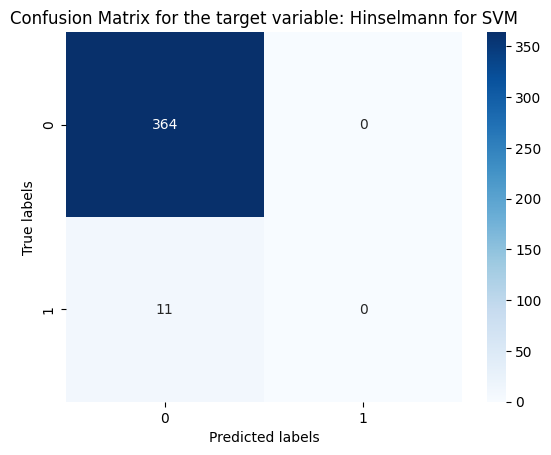

In [60]:
# SVM Model 
Hinselmann_SVM_Model = svm.SVC( C=10.0 , gamma = 'auto' , kernel = 'rbf' , random_state = 50 , shrinking = True , probability = True )
Hinselmann_SVM_Model.fit(Train_X_H , Train_Y_H)
Hinselmann_Predict = Hinselmann_SVM_Model.predict(Test_X_H)

# Calculating the evaluation metrics
Hinselmann_Accuracy = accuracy_score(Test_Y_H, Hinselmann_Predict)
Hinselmann_Precision = precision_score(Test_Y_H, Hinselmann_Predict , zero_division=0)
Hinselmann_Recall = recall_score(Test_Y_H,Hinselmann_Predict)

# Confusion matrix
Hinselmann_Confusion_Matrix = confusion_matrix(Test_Y_H, Hinselmann_Predict)
sns.heatmap(Hinselmann_Confusion_Matrix ,fmt ='d', annot = True, cmap="Blues")
plt.title("Confusion Matrix for the target variable: Hinselmann for SVM")
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

plt.show()

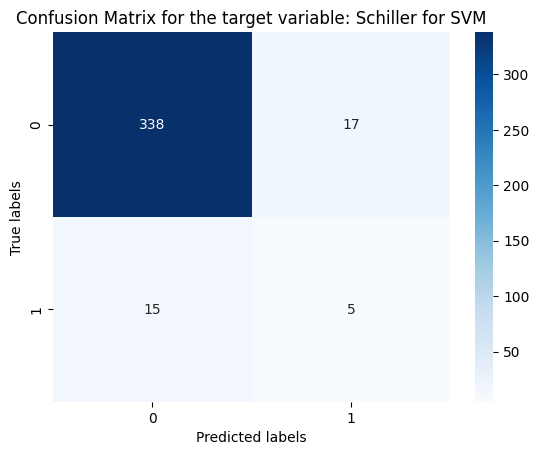

In [61]:
# SVM Model 
Schiller_SVM_Model = svm.SVC( C=1000 , gamma = 'scale' , kernel = 'poly' , random_state = 20 , shrinking = True , probability = True )
Schiller_SVM_Model.fit(Train_X_S , Train_Y_S)
Schiller_Predict = Schiller_SVM_Model.predict(Test_X_S)

Schiller_Accuracy = accuracy_score(Test_Y_S, Schiller_Predict)
Schiller_Precision = precision_score(Test_Y_S,Schiller_Predict, zero_division=0)
Schiller_Recall = recall_score(Test_Y_S,Schiller_Predict)

Schiller_Confusion_Matrix = confusion_matrix(Test_Y_S, Schiller_Predict)
sns.heatmap(Schiller_Confusion_Matrix ,fmt ='d', annot = True, cmap="Blues")
plt.title("Confusion Matrix for the target variable: Schiller for SVM")
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

plt.show()

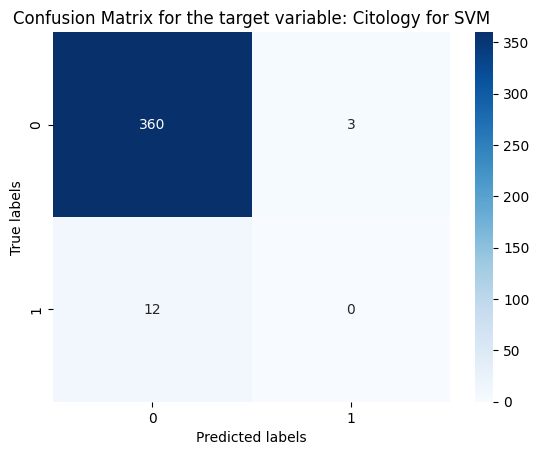

In [62]:
# SVM Model 
Citology_SVM_Model = svm.SVC( C=10.0 , gamma = 'scale' , kernel = 'rbf' , random_state = 20 , shrinking = True , probability = True )
Citology_SVM_Model.fit(Train_X_C , Train_Y_C)
Citology_Predict = Citology_SVM_Model.predict(Test_X_C)

Citology_Accuracy = accuracy_score(Test_Y_C, Citology_Predict)
Citology_Precision = precision_score(Test_Y_C,Citology_Predict, zero_division=0)
Citology_Recall = recall_score(Test_Y_C,Citology_Predict)

Citology_Confusion_Matrix = confusion_matrix(Test_Y_C, Citology_Predict)
sns.heatmap(Citology_Confusion_Matrix ,fmt ='d', annot = True, cmap="Blues")
plt.title("Confusion Matrix for the target variable: Citology for SVM")
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

plt.show()

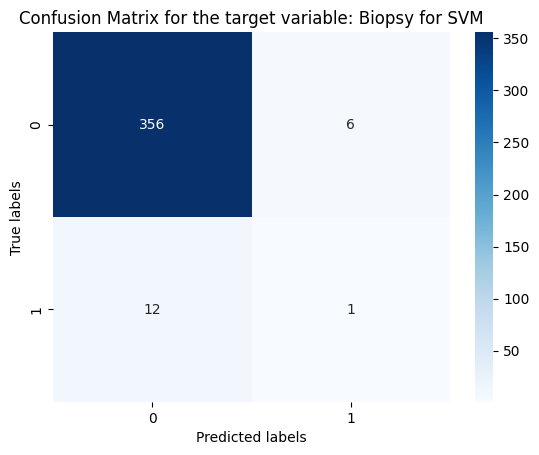

In [63]:
# SVM Model 
Biopsy_SVM_Model = svm.SVC( C=10.0 , gamma = 'scale' , kernel = 'rbf' , random_state = 20 , shrinking = True , probability = True )
Biopsy_SVM_Model.fit(Train_X_B , Train_Y_B)
Biopsy_Predict = Biopsy_SVM_Model.predict(Test_X_B)

Biopsy_Accuracy = accuracy_score(Test_Y_B, Biopsy_Predict)
Biopsy_Precision = precision_score(Test_Y_B, Biopsy_Predict, zero_division=0)
Biopsy_Recall = recall_score(Test_Y_B,Biopsy_Predict)

Biopsy_Confusion_Matrix = confusion_matrix(Test_Y_B, Biopsy_Predict)
sns.heatmap(Biopsy_Confusion_Matrix ,fmt ='d', annot = True, cmap="Blues")
plt.title("Confusion Matrix for the target variable: Biopsy for SVM")
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

plt.show()

In [64]:
# KNN Model
Hinselmann_KNN_Model = KNeighborsClassifier(n_neighbors=1)
Hinselmann_KNN_Model.fit(Train_X_H , Train_Y_H)
Hinselmann_Predict_KNN = Hinselmann_KNN_Model.predict(Test_X_H)

# Calculating the evaluation metrics
Hinselmann_Accuracy_KNN = accuracy_score(Test_Y_H, Hinselmann_Predict_KNN)
Hinselmann_Precision_KNN = precision_score(Test_Y_H, Hinselmann_Predict_KNN, zero_division=0)
Hinselmann_Recall_KNN = recall_score(Test_Y_H, Hinselmann_Predict_KNN)

Hinselmann_Confusion_Matrix_KNN = confusion_matrix(Test_Y_H , Hinselmann_Predict_KNN)
sns.heatmap(Hinselmann_Confusion_Matrix_KNN ,fmt ='d', annot = True, cmap="Blues")
plt.title("Confusion Matrix for the target variable: Hinselmann for KNN")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.show()

In [65]:
Schiller_KNN_Model = KNeighborsClassifier(n_neighbors=1)
Schiller_KNN_Model.fit(Train_X_S , Train_Y_S)
Schiller_Predict_KNN = Schiller_KNN_Model.predict(Test_X_S)

Schiller_Accuracy_KNN = accuracy_score(Test_Y_S, Schiller_Predict_KNN)
Schiller_Precision_KNN = precision_score(Test_Y_S, Schiller_Predict_KNN, zero_division=0)
Schiller_Recall_KNN = recall_score(Test_Y_S, Schiller_Predict_KNN)

Schiller_Confusion_Matrix_KNN = confusion_matrix(Test_Y_S , Schiller_Predict_KNN)
sns.heatmap(Schiller_Confusion_Matrix_KNN ,fmt ='d', annot = True, cmap="Blues")
plt.title("Confusion Matrix for the target variable: Schiller for KNN")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.show()

In [66]:
Citology_KNN_Model = KNeighborsClassifier(n_neighbors=1)
Citology_KNN_Model.fit(Train_X_C , Train_Y_C)
Citology_Predict_KNN = Citology_KNN_Model.predict(Test_X_C)

Citology_Accuracy_KNN = accuracy_score(Test_Y_C, Citology_Predict_KNN)
Citology_Precision_KNN = precision_score(Test_Y_C, Citology_Predict_KNN, zero_division=0)
Citology_Recall_KNN = recall_score(Test_Y_C, Citology_Predict_KNN)

Citology_Confusion_Matrix_KNN = confusion_matrix(Test_Y_C , Citology_Predict_KNN)
sns.heatmap(Citology_Confusion_Matrix_KNN ,fmt ='d', annot = True, cmap="Blues")
plt.title("Confusion Matrix for the target variable: Citology for KNN")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.show()

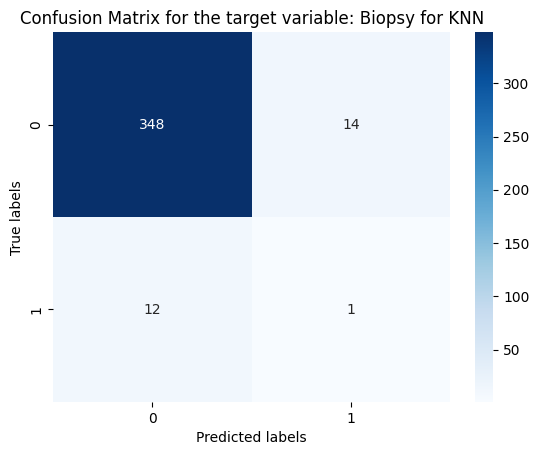

In [67]:
Biopsy_KNN_Model = KNeighborsClassifier(n_neighbors=1)
Biopsy_KNN_Model.fit(Train_X_B , Train_Y_B)
Biopsy_Predict_KNN = Biopsy_KNN_Model.predict(Test_X_B)

Biopsy_Accuracy_KNN = accuracy_score(Test_Y_B, Biopsy_Predict_KNN)
Biopsy_Precision_KNN = precision_score(Test_Y_B, Biopsy_Predict_KNN, zero_division=0)
Biopsy_Recall_KNN = recall_score(Test_Y_B, Biopsy_Predict_KNN)

Biopsy_Confusion_Matrix_KNN = confusion_matrix(Test_Y_B , Biopsy_Predict_KNN)
sns.heatmap(Biopsy_Confusion_Matrix_KNN ,fmt ='d', annot = True, cmap="Blues")
plt.title("Confusion Matrix for the target variable: Biopsy for KNN")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.show()

In [68]:
# Table for evaluation metrices using SVM classifier using pandas dataframe
table = { 'Target Variable': ['Hinselmann','Schiller','Citology' ,'Biopsy'],
    'Accuracy':[Hinselmann_Accuracy , Schiller_Accuracy , Citology_Accuracy , Biopsy_Accuracy] , 
    'Recall':[Hinselmann_Recall , Schiller_Recall , Citology_Recall , Biopsy_Recall],
    'Precision':[ Hinselmann_Precision , Schiller_Precision, Citology_Precision, Biopsy_Precision ]
}
print("Three evaluation metrices using SVM classifier")
df = pd.DataFrame(table)
df = df.reset_index(drop=True)
df


Three evaluation metrices using SVM classifier


Target Variable  Accuracy    Recall  Precision
0      Hinselmann  0.970667  0.000000   0.000000
1        Schiller  0.914667  0.250000   0.227273
2        Citology  0.960000  0.000000   0.000000
3          Biopsy  0.952000  0.076923   0.142857

In [69]:
# Table for evaluation metrices using SVM classifier using pandas dataframe
table = { 'Target Variable': ['Hinselmann','Schiller','Citology' ,'Biopsy'],
    'Accuracy':[Hinselmann_Accuracy_KNN , Schiller_Accuracy_KNN , Citology_Accuracy_KNN , Biopsy_Accuracy_KNN] , 
    'Recall':[Hinselmann_Recall_KNN , Schiller_Recall_KNN , Citology_Recall_KNN , Biopsy_Recall_KNN],
    'Precision':[ Hinselmann_Precision_KNN , Schiller_Precision_KNN, Citology_Precision_KNN, Biopsy_Precision_KNN ]
}
print("Three evaluation metrices using KNN classifier")
df = pd.DataFrame(table)
df = df.reset_index(drop=True)
df

Three evaluation metrices using KNN classifier


Target Variable  Accuracy    Recall  Precision
0      Hinselmann  0.946667  0.000000   0.000000
1        Schiller  0.885333  0.100000   0.074074
2        Citology  0.920000  0.083333   0.050000
3          Biopsy  0.930667  0.076923   0.066667